In [1]:
! pip3 install pandas
import pandas as pd

You should consider upgrading via the 'C:\Users\ДНС\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
Final_pd = pd.read_csv('Финальный датасет.csv')
Final_pd

,Unnamed: 0,stars,name,feedback,avg_sent,gender,num_words,emoji
0,0,5,Павел,Материал плотный хороший Очень стильно смотр...,2.666667,M,8,0
1,1,5,Тарабрин Николай,Крутая майка Материал плотный качетсвенный,2.500000,M,5,0
2,3,5,Горбатов Николай,Гуд,1.000000,M,1,0
3,4,5,Горбатов Николай,Гуд,1.000000,M,1,0
4,5,5,Олег,Плотный хлопок сидит по размеру,5.000000,M,5,0
...,...,...,...,...,...,...,...,...
1654,800,5,Юлия,👍🏻,1.000000,F,1,1
1655,801,5,Татьяна,Отличная футболка для сна Размер в размер,3.500000,F,7,0
1656,802,1,Захарова Ира,Махровая футболка есть такие кто захочет тако...,4.666667,F,14,0
1657,803,3,надежда,футболка как махровое полотенце отказалась,5.000000,F,5,0


In [3]:
Final_pd = Final_pd.drop(['Unnamed: 0'], axis=1, inplace=False)

In [4]:
import os
import re

In [5]:
import nltk
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
nltk.download('stopwords')
from nltk import tokenize
import itertools
from pymorphy2 import MorphAnalyzer
from collections import Counter, defaultdict
import numpy as np
import string
from string import punctuation
from gensim.utils import tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ДНС\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
stops = set(stopwords.words('russian') + ["это", "весь","всё", "футболка", "очень"]) # определили список стоп-слов
morph = MorphAnalyzer()

In [8]:
def normalize(text):
    tokens = re.findall('[а-яёa-z0-9]+', str(text).lower())
    normalized_text = [morph.parse(word)[0].normal_form for word \
                                                            in tokens]
    normalized_text = [word for word in normalized_text if len(word) > 2 and word not in stops]
    
    return normalized_text

In [9]:
feedback = Final_pd['feedback'].tolist()

In [10]:
feedback_normalized = [' '.join(normalize(elem)) for elem in feedback]
Final_pd_norm = Final_pd .assign(feedback=feedback_normalized)
Final_pd_norm# нормализовали текст отзыва

,stars,name,feedback,avg_sent,gender,num_words,emoji
0,5,Павел,материал плотный хороший стильно смотреться по...,2.666667,M,8,0
1,5,Тарабрин Николай,крутой майк материал плотный качетсвенный,2.500000,M,5,0
2,5,Горбатов Николай,гуд,1.000000,M,1,0
3,5,Горбатов Николай,гуд,1.000000,M,1,0
4,5,Олег,плотный хлопок сидеть размер,5.000000,M,5,0
...,...,...,...,...,...,...,...
1654,5,Юлия,,1.000000,F,1,1
1655,5,Татьяна,отличный сон размер размер,3.500000,F,7,0
1656,1,Захарова Ира,махровый захотеть носить точно свободный,4.666667,F,14,0
1657,3,надежда,махровый полотенце отказаться,5.000000,F,5,0


In [22]:
Final_pd_norm.to_csv("Финальный датасет норм.csv")

In [11]:
Final_pd_norm = pd.read_csv('Финальный датасет норм.csv')
Final_pd_norm

,Unnamed: 0,stars,name,feedback,avg_sent,gender,num_words,emoji
0,0,5,Павел,материал плотный хороший стильно смотреться по...,2.666667,M,8,0
1,1,5,Тарабрин Николай,крутой майк материал плотный качетсвенный,2.500000,M,5,0
2,2,5,Горбатов Николай,гуд,1.000000,M,1,0
3,3,5,Горбатов Николай,гуд,1.000000,M,1,0
4,4,5,Олег,плотный хлопок сидеть размер,5.000000,M,5,0
...,...,...,...,...,...,...,...,...
1654,1654,5,Юлия,NaN,1.000000,F,1,1
1655,1655,5,Татьяна,отличный сон размер размер,3.500000,F,7,0
1656,1656,1,Захарова Ира,махровый захотеть носить точно свободный,4.666667,F,14,0
1657,1657,3,надежда,махровый полотенце отказаться,5.000000,F,5,0


In [12]:
Final_pd_norm = Final_pd_norm.drop(['Unnamed: 0'], axis=1, inplace=False)

In [13]:
text_list = Final_pd["feedback"].to_list()
text_string = str(text_list)
print("Слов до нормализации:", len(text_string))
text_list_norm = Final_pd_norm["feedback"].to_list()
text_string_norm = str(text_list_norm)
print("Слов после нормализации:",len(text_string_norm))

Слов до нормализации: 84839
Слов после нормализации: 64441


In [14]:
Final_F = Final_pd[Final_pd['gender']=="F"]
text_list_F = Final_F ["feedback"].to_list()
text_string_F = str(text_list_F)
print("Слов в женских отзывах до нормализации:", len(text_string_F ))
Final_F_norm = Final_pd_norm[Final_pd_norm['gender']=="F"]
text_list_F_norm = Final_F_norm ["feedback"].to_list()
text_string_F_norm = str(text_list_F_norm)
print("Слов в женских отзывах после нормализации:", len(text_string_F_norm))
Final_M = Final_pd[Final_pd['gender']=="M"]
text_list_M = Final_M ["feedback"].to_list()
text_string_M = str(text_list_M)
print("Слов в мужских отзывах до нормализации:", len(text_string_M))
Final_M_norm = Final_pd_norm[Final_pd_norm['gender']=="M"]
text_list_M_norm = Final_M_norm ["feedback"].to_list()
text_string_M_norm = str(text_list_M_norm)
print("Слов в мужских отзывах после нормализации:", len(text_string_M_norm))

Слов в женских отзывах до нормализации: 48961
Слов в женских отзывах после нормализации: 37005
Слов в мужских отзывах до нормализации: 35878
Слов в мужских отзывах после нормализации: 27436


In [15]:
import numpy as np
import pandas as pd
# from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

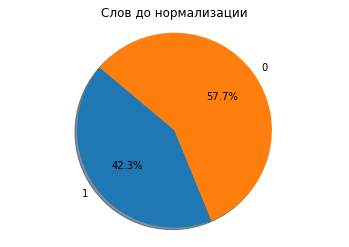

In [19]:
labels = '1', '0'
sizes = [35878, 48961]


# Plot
plt.pie(sizes,labels=labels,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Слов до нормализации')
plt.axis('equal')
plt.show()

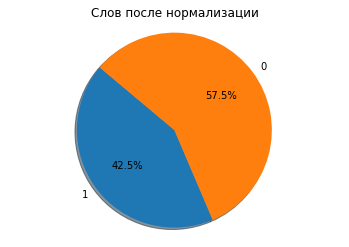

In [18]:
labels = '1', '0'
sizes = [27360, 36968,]


# Plot
plt.pie(sizes,labels=labels,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Слов после нормализации')
plt.axis('equal')
plt.show()